# Decision Trees

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
# Loading data
file_path = Path("../Resources/songAttributes_1999-2019.csv")
df_DT = pd.read_csv(file_path)
df_DT.head(3)

,Unnamed: 0,Acousticness,Album,Artist,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Name,Popularity,Speechiness,Tempo,TimeSignature,Valence
0,0,0.000728,Collective Soul (Deluxe Version),Collective Soul,0.520,234947,0.904,False,0.010300,0.0634,-5.030,1,Welcome All Again,35,0.0309,106.022,4,0.365
1,1,0.018200,Collective Soul (Deluxe Version),Collective Soul,0.581,239573,0.709,False,0.000664,0.1740,-4.909,1,Fuzzy,31,0.0282,120.027,4,0.408
2,2,0.000473,Collective Soul (Deluxe Version),Collective Soul,0.572,198400,0.918,False,0.000431,0.0977,-3.324,0,Dig,30,0.0559,144.061,4,0.370


In [3]:
df_DT = df_DT.drop(columns= ["Name", "Unnamed: 0", "Album", "Artist"])
df_DT = pd.get_dummies(df_DT)
df_DT["is_popular"] = (df_DT["Popularity"] >= 30)
df_DT = df_DT.drop(columns= ["Popularity"])
df_DT.head(3)

,Acousticness,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Speechiness,Tempo,TimeSignature,Valence,is_popular
0,0.000728,0.520,234947,0.904,False,0.010300,0.0634,-5.030,1,0.0309,106.022,4,0.365,True
1,0.018200,0.581,239573,0.709,False,0.000664,0.1740,-4.909,1,0.0282,120.027,4,0.408,True
2,0.000473,0.572,198400,0.918,False,0.000431,0.0977,-3.324,0,0.0559,144.061,4,0.370,True


In [4]:
# Define features set
X = df_DT.copy()
X.drop("is_popular", axis=1, inplace=True)
X.head()

,Acousticness,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Speechiness,Tempo,TimeSignature,Valence
0,0.000728,0.520,234947,0.904,False,0.010300,0.0634,-5.030,1,0.0309,106.022,4,0.365
1,0.018200,0.581,239573,0.709,False,0.000664,0.1740,-4.909,1,0.0282,120.027,4,0.408
2,0.000473,0.572,198400,0.918,False,0.000431,0.0977,-3.324,0,0.0559,144.061,4,0.370
3,0.000970,0.596,231453,0.661,False,0.000033,0.1130,-5.051,1,0.0254,111.975,4,0.183
4,0.000036,0.520,222520,0.808,False,0.000010,0.0800,-4.553,0,0.0318,92.721,4,0.666


In [5]:
y = df_DT["is_popular"].values.reshape(-1, 1)
y[:5]


array([[ True],
       [ True],
       [ True],
       [ True],
       [False]])

In [6]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)



In [7]:
# Creating StandardScaler instance
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)



In [8]:
#Creating the Model
model = tree.DecisionTreeClassifier()
model = model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)


In [9]:
#Evaluating the model
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,21720,6585
Actual 1,6504,3924


Accuracy Score : 0.662071102160948
Classification Report
              precision    recall  f1-score   support

       False       0.77      0.77      0.77     28305
        True       0.37      0.38      0.37     10428

    accuracy                           0.66     38733
   macro avg       0.57      0.57      0.57     38733
weighted avg       0.66      0.66      0.66     38733



# --------------------------------------

# Random Forest

In [10]:
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [11]:
file_path = Path("../Resources/songAttributes_1999-2019.csv")
df_RF = pd.read_csv(file_path)
df_RF.head(3)

,Unnamed: 0,Acousticness,Album,Artist,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Name,Popularity,Speechiness,Tempo,TimeSignature,Valence
0,0,0.000728,Collective Soul (Deluxe Version),Collective Soul,0.520,234947,0.904,False,0.010300,0.0634,-5.030,1,Welcome All Again,35,0.0309,106.022,4,0.365
1,1,0.018200,Collective Soul (Deluxe Version),Collective Soul,0.581,239573,0.709,False,0.000664,0.1740,-4.909,1,Fuzzy,31,0.0282,120.027,4,0.408
2,2,0.000473,Collective Soul (Deluxe Version),Collective Soul,0.572,198400,0.918,False,0.000431,0.0977,-3.324,0,Dig,30,0.0559,144.061,4,0.370


In [12]:
df_RF = df_RF.drop(columns= ["Name", "Unnamed: 0", "Album", "Artist"])
df_RF = pd.get_dummies(df_RF)
df_RF["is_popular"] = (df_RF["Popularity"] >= 30)
df_RF = df_RF.drop(columns= ["Popularity"])
df_RF.head(3)

,Acousticness,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Speechiness,Tempo,TimeSignature,Valence,is_popular
0,0.000728,0.520,234947,0.904,False,0.010300,0.0634,-5.030,1,0.0309,106.022,4,0.365,True
1,0.018200,0.581,239573,0.709,False,0.000664,0.1740,-4.909,1,0.0282,120.027,4,0.408,True
2,0.000473,0.572,198400,0.918,False,0.000431,0.0977,-3.324,0,0.0559,144.061,4,0.370,True


In [13]:
# Define features set
X = df_RF.copy()
X.drop("is_popular", axis=1, inplace=True)
X.head()

,Acousticness,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Speechiness,Tempo,TimeSignature,Valence
0,0.000728,0.520,234947,0.904,False,0.010300,0.0634,-5.030,1,0.0309,106.022,4,0.365
1,0.018200,0.581,239573,0.709,False,0.000664,0.1740,-4.909,1,0.0282,120.027,4,0.408
2,0.000473,0.572,198400,0.918,False,0.000431,0.0977,-3.324,0,0.0559,144.061,4,0.370
3,0.000970,0.596,231453,0.661,False,0.000033,0.1130,-5.051,1,0.0254,111.975,4,0.183
4,0.000036,0.520,222520,0.808,False,0.000010,0.0800,-4.553,0,0.0318,92.721,4,0.666


In [14]:
y = df_RF["is_popular"].ravel()
y[:5]

array([ True,  True,  True,  True, False])

In [15]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [16]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [17]:
#Creting the model
RF_model = RandomForestClassifier(n_estimators=500, random_state=78)
RF_model = RF_model.fit(X_train_scaled, y_train)

In [18]:
# Making predictions using the testing data
predictions = RF_model.predict(X_test_scaled)

In [19]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,27620,729
Actual 1,8947,1437


Accuracy Score : 0.7501871788913846
Classification Report
              precision    recall  f1-score   support

       False       0.76      0.97      0.85     28349
        True       0.66      0.14      0.23     10384

    accuracy                           0.75     38733
   macro avg       0.71      0.56      0.54     38733
weighted avg       0.73      0.75      0.68     38733



### Feature Importance

In [20]:
# Random Forests in sklearn will automatically calculate feature importance
importances = RF_model.feature_importances_
# We can sort the features by their importance
sorted(zip(RF_model.feature_importances_, X.columns), reverse=True)

[(0.1094082163762957, 'Duration'),
 (0.10627465422613715, 'Loudness'),
 (0.1010112121362072, 'Acousticness'),
 (0.1007591073284253, 'Speechiness'),
 (0.10018013469411012, 'Tempo'),
 (0.09771355566425961, 'Liveness'),
 (0.09673515035359895, 'Valence'),
 (0.09646101987723345, 'Danceability'),
 (0.0962407324207356, 'Energy'),
 (0.06520077671902116, 'Instrumentalness'),
 (0.012826857135319295, 'Mode'),
 (0.008880606997430993, 'Explicit'),
 (0.008307976071225506, 'TimeSignature')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

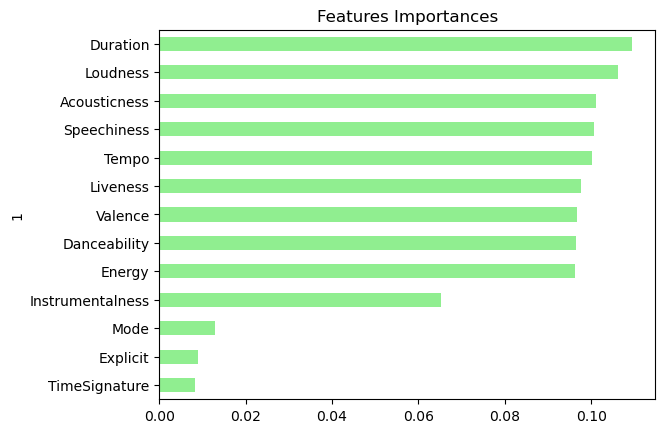

In [21]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(RF_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

El accuracy altísimo que nos estaba saliendo en todas las pruebas era porque is_popular está muy correlacionado con popularity, y popularity era un feature que estabamos juntando con todos los demás. Ya si quitamos popularity de los features, y solo medimos is_popular como el target vs. todos los demás features ya salen resultados que hacen mucho más sentido.